In [12]:
!pip install transformers

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Set intial variables and constants
%config InlineBackend.figure_format='retina'

# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/project 2024/Dataset-20231210T071705Z-001/Dataset/train.csv')
df.shape

(30000, 3)

In [17]:
# Let's have a look at the data
df.head()

,Unnamed: 0,review,sentiment
0,0,One reviewer mentioned after watching Oz episo...,positive
1,1,A wonderful little production The filming tech...,positive
2,2,I thought wonderful way spend time hot summer ...,positive
3,3,Basically s family little boy Jake think s zom...,negative
4,4,Petter Mattei Love Time Money visually stunnin...,positive


In [18]:
# Let's check for missing values
df.isnull().sum()

Unnamed: 0    0
review        0
sentiment     0
dtype: int64

In [20]:
df.columns

Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')

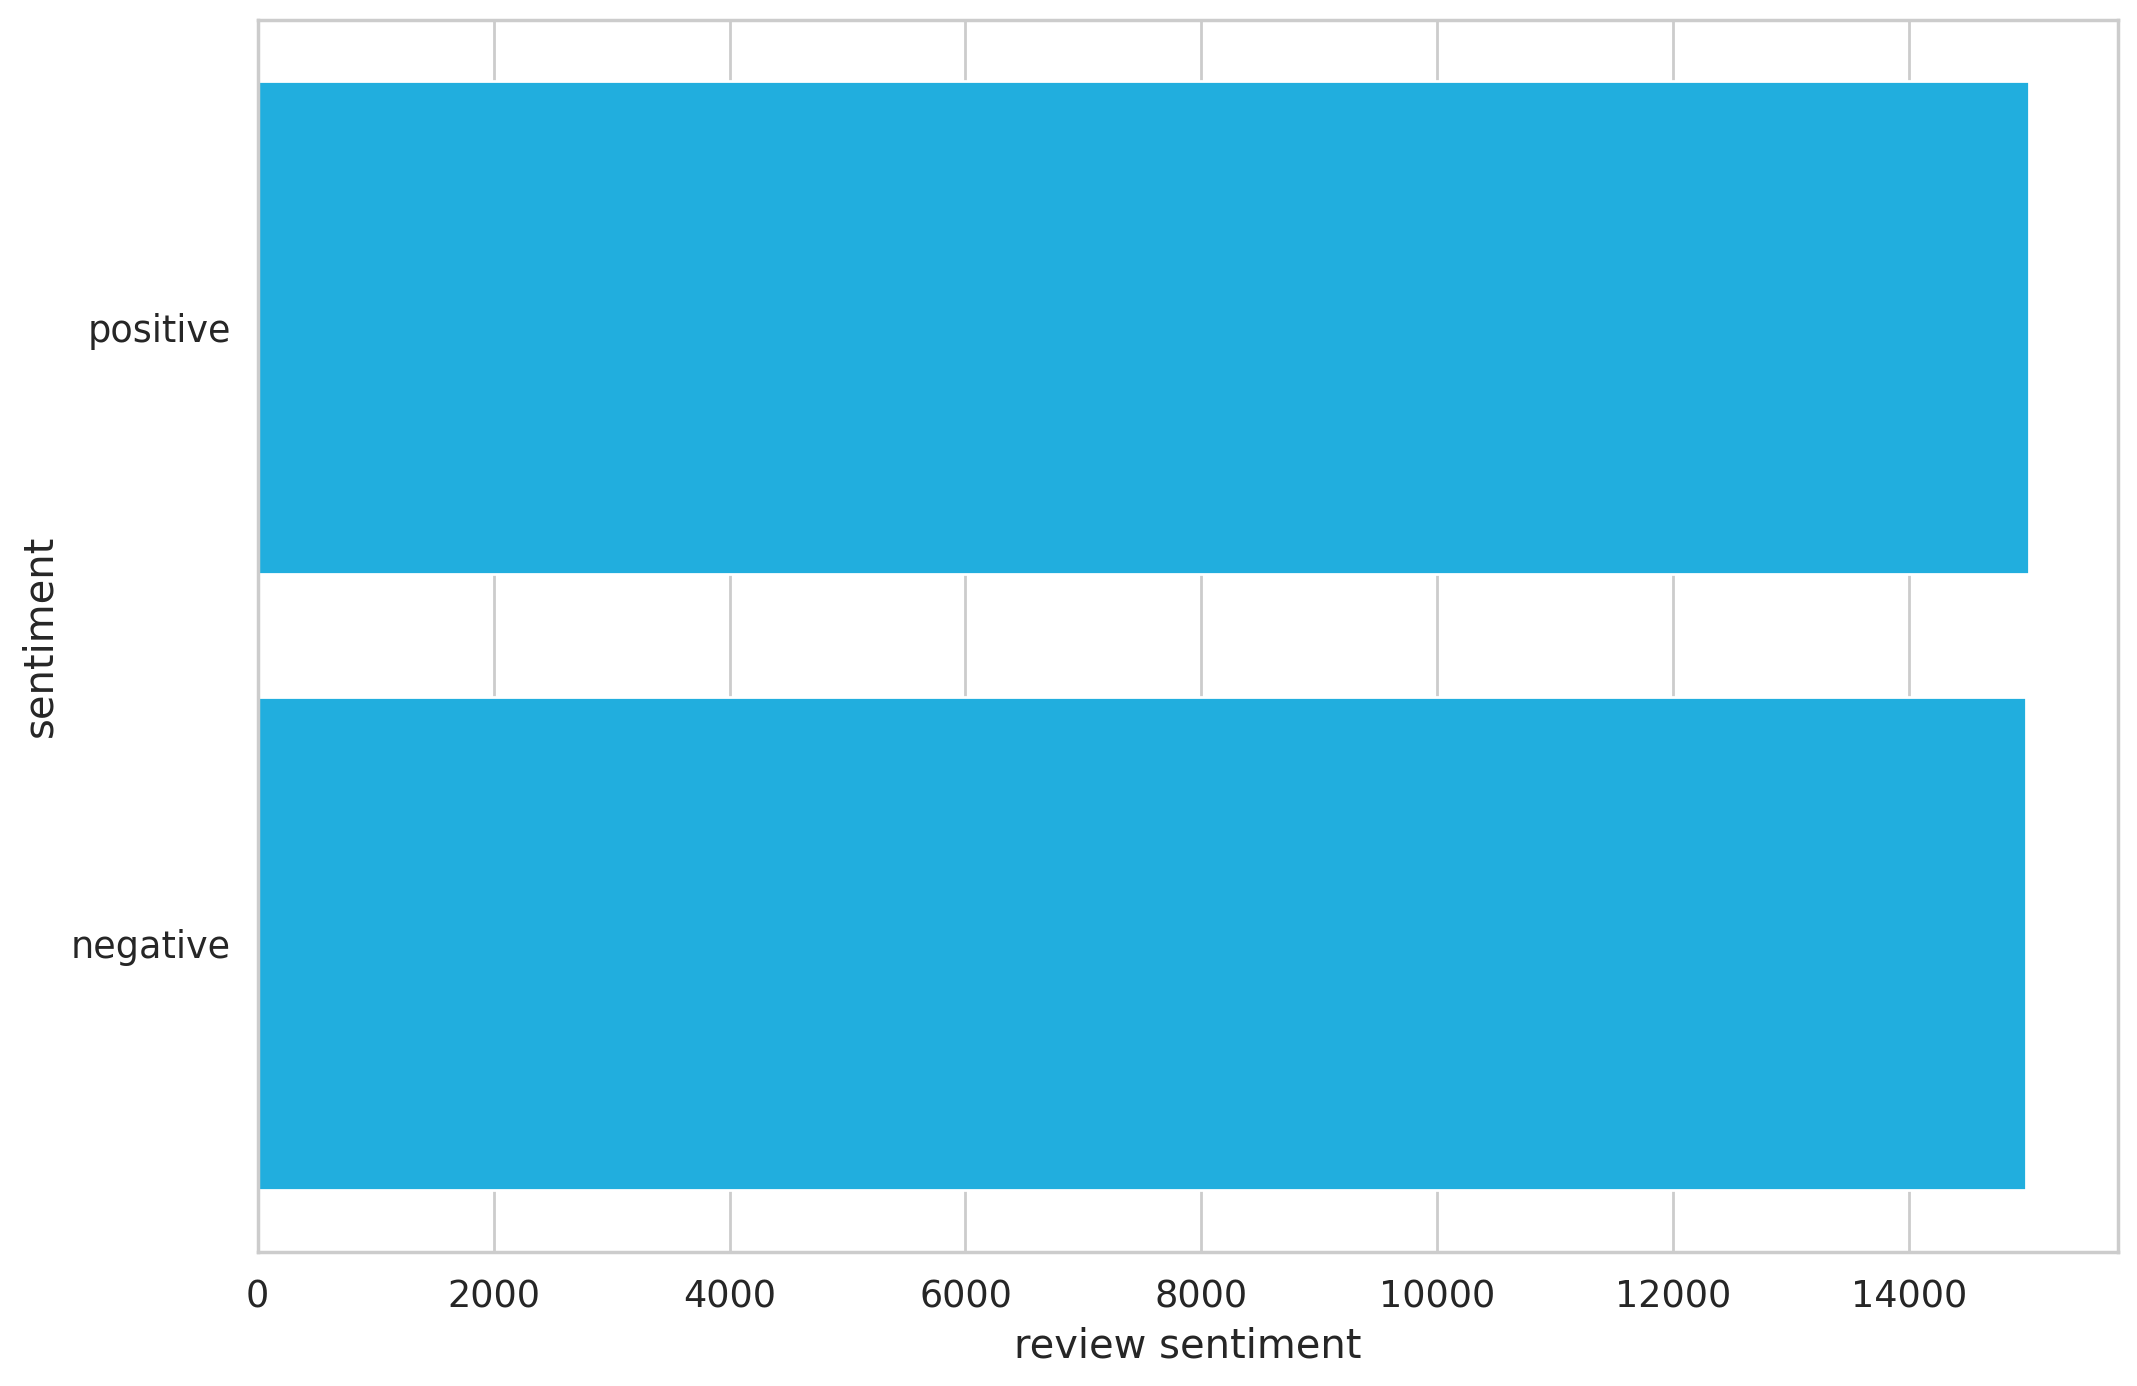

In [21]:
# Let's have a look at the class balance.
sns.countplot(df.sentiment)
plt.xlabel('review sentiment');

In [22]:
# Set the model name
MODEL_NAME = 'bert-base-cased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [23]:
# Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


In [25]:
# Store length of each review
token_lens = []

# Iterate through the content slide
for txt in df.review:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Text(0.5, 0, 'Token count')

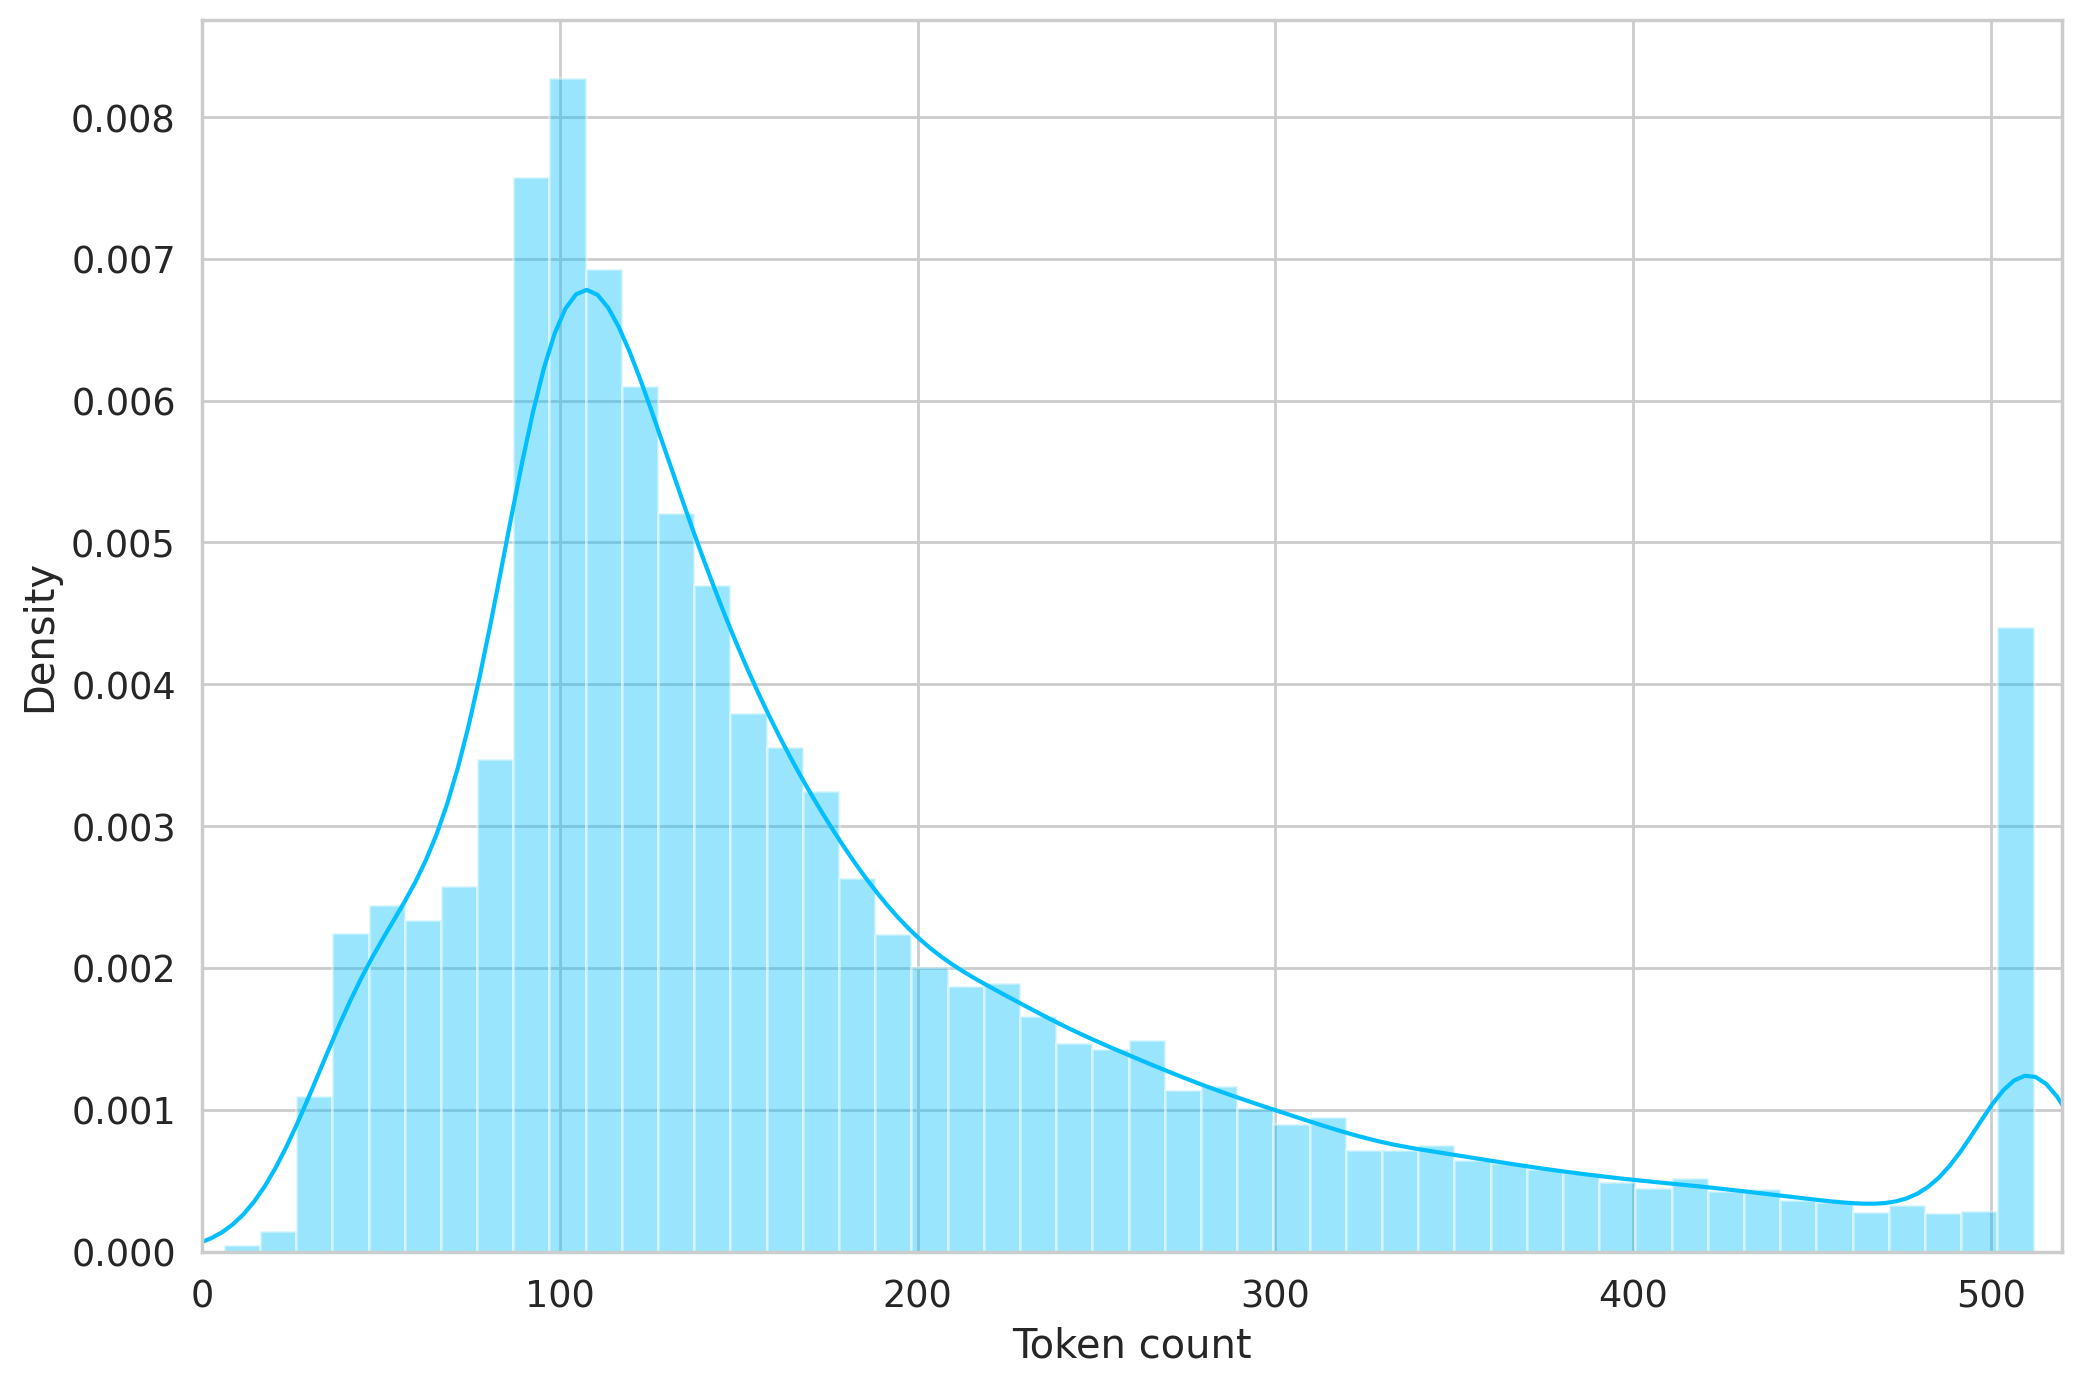

In [31]:
# plot the distribution of review lengths
sns.distplot(token_lens)
plt.xlim([0, 520]);
plt.xlabel('Token count')

In [32]:
MAX_LEN = 520